In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import norse.torch as snn
from norse.torch.functional import lif

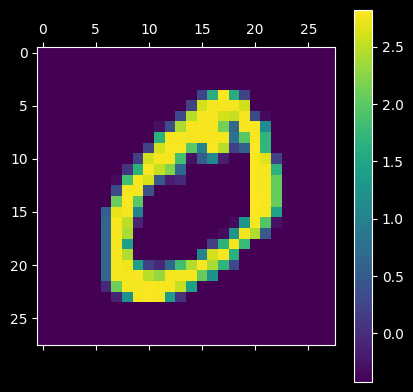

In [2]:
img = torch.load("notebooks/data/img.pt")

plt.matshow(img[0])
plt.colorbar()
plt.show()

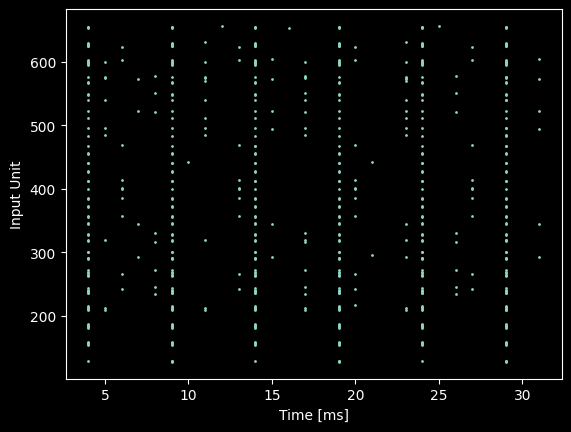

In [3]:
from norse.torch import ConstantCurrentLIFEncoder

T = 32
example_encoder = ConstantCurrentLIFEncoder(T)

example_input = example_encoder(img)
example_spikes = example_input.reshape(T, 28 * 28).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, s=1)
plt.ylabel("Input Unit")
plt.xlabel("Time [ms]")
plt.show()

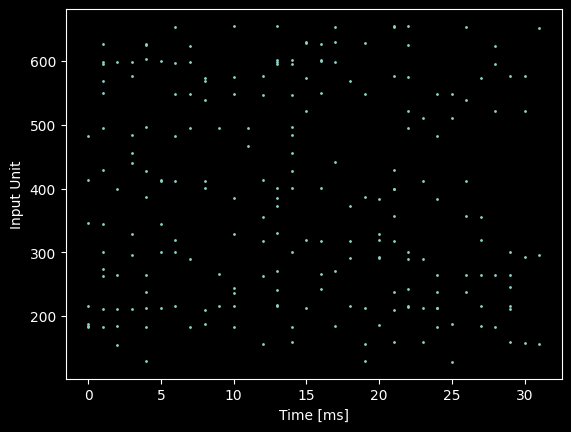

In [4]:
from norse.torch import PoissonEncoder

T = 32
example_encoder = PoissonEncoder(T, f_max=20)

example_input = example_encoder(img)
example_spikes = example_input.reshape(T, 28 * 28).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, s=1)
plt.ylabel("Input Unit")
plt.xlabel("Time [ms]")
plt.show()

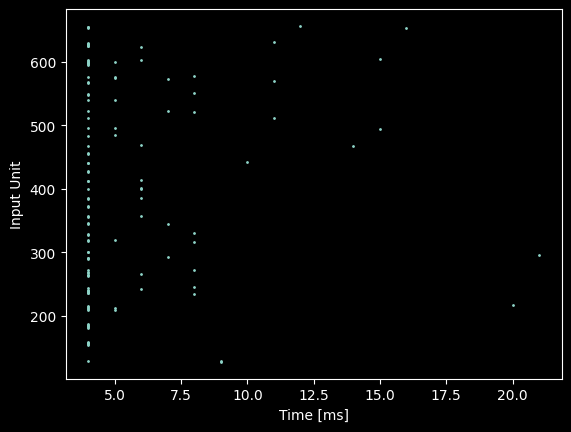

In [5]:
from norse.torch import SpikeLatencyLIFEncoder

T = 32
example_encoder = SpikeLatencyLIFEncoder(T)

example_input = example_encoder(img)
example_spikes = example_input.reshape(T, 28 * 28).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, s=1)
plt.ylabel("Input Unit")
plt.xlabel("Time [ms]")
plt.show()

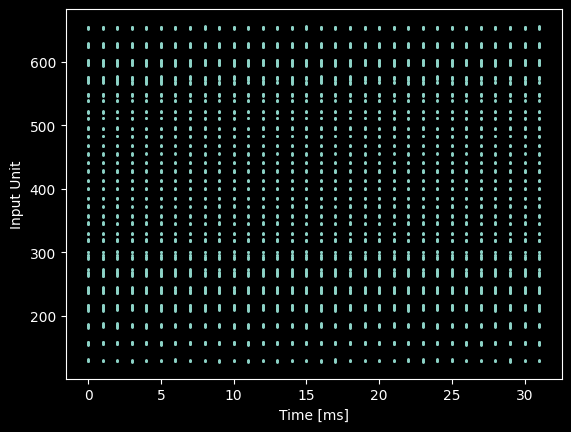

In [29]:
from norse.torch.module.encode import PoissonEncoderStep

T = 32
example_encoder = PoissonEncoderStep()

example_input = torch.stack([example_encoder(img) for _ in range(T)])
example_spikes = example_input.reshape(T, 28 * 28).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, s=1)
plt.ylabel("Input Unit")
plt.xlabel("Time [ms]")
plt.show()

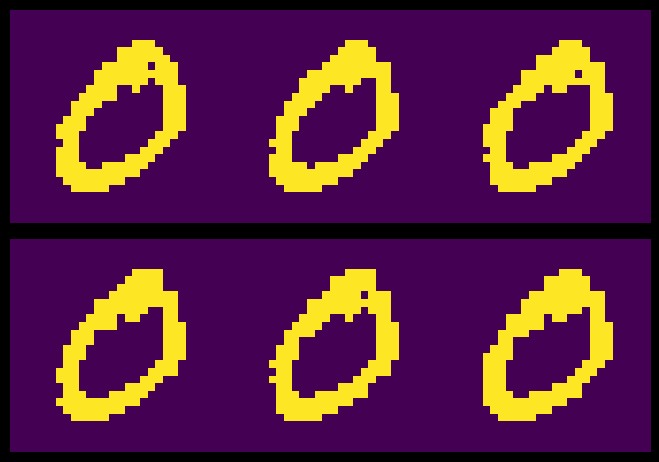

In [49]:
from norse.torch.module.encode import PoissonEncoderStep

T = 32
example_encoder = PoissonEncoderStep()

example_input = torch.stack([example_encoder(img) for _ in range(T)])
fig, axs = plt.subplots(2, 3)
for example, ax in zip(example_input, axs.flatten()):
    ax.matshow(example[0])
    ax.axis("off")
fig.tight_layout(pad=0)